# Proyek Machine Learning : Klasifikasi Rock Paper Scissors
- Nama: Edward Thomas Alexander
- Email: edwardthomas753@gmail.com
- Id Dicoding: veritaz

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [ ]:
from google.colab import drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_dir = "/content/drive/MyDrive/Datasets RPS/train"
test_dir = "/content/drive/MyDrive/Datasets RPS/test"

In [ ]:
paper_photo= "/content/drive/MyDrive/Datasets RPS/train/paper"
rock_photo= "/content/drive/MyDrive/Datasets RPS/train/rock"
scissor_photo= "/content/drive/MyDrive/Datasets RPS/traincissors"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


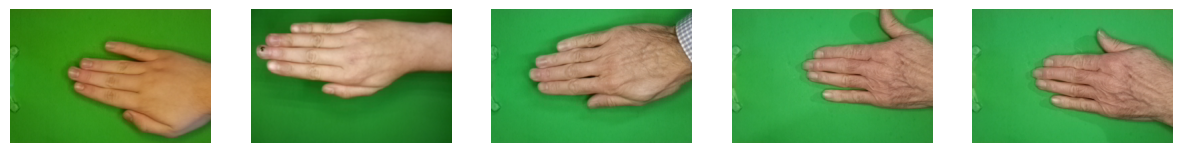

In [ ]:
import os
import random
import matplotlib.pyplot as plt
drive.mount('/content/drive')

paper_dir = "/content/drive/MyDrive/Datasets RPS/train/paper"

img_files= os.listdir(paper_dir)
png_files = [file for file in img_files if file.endswith('png')]

count=5

total_img = len(png_files)

if total_img > count:
  random_img = random.sample(png_files, count)

  plt.figure(figsize=(15,8))
  for i, img_name in enumerate(random_img):
    img_path = os.path.join(paper_dir, img_name)
    sp = plt.subplot(1, count, i+1)
    img = plt.imread(img_path)
    plt.imshow(img)
    plt.axis('off')

  plt.show()
else:
  print("Jumlah data kurang dari : ", count)



In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    zoom_range=0.2,
    shear_range=0.2,
    validation_split = 0.4
)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)


Found 1314 images belonging to 3 classes.


In [ ]:
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    validation_split=0.4
                    )

test_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(100, 100),
        batch_size=32,
        class_mode='categorical',
        shuffle=True,
        subset='validation')

Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(100,100,3)),
        tf.keras.layers.MaxPooling2D(2, 2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Dropout(0.25),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(512, activation='relu'),
        tf.keras.layers.Dense(3, activation=tf.nn.softmax)
])



In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_20 (MaxPooli  (None, 49, 49, 16)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 49, 49, 16)        0         
                                                                 
 conv2d_21 (Conv2D)          (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_21 (Dropout)        (None, 23, 23, 32)       

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer='RMSprop',
              metrics=['accuracy'])


In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=16,
      epochs=30,
      validation_data=test_generator,
      validation_steps=5,
      verbose=1)

Epoch 1/30
16/16 [==============================] - 11s 692ms/step - loss: 0.1496 - accuracy: 0.9551 - val_loss: 0.1219 - val_accuracy: 0.9688
Epoch 2/30
16/16 [==============================] - 10s 628ms/step - loss: 0.1092 - accuracy: 0.9585 - val_loss: 0.1153 - val_accuracy: 0.9500
Epoch 3/30
16/16 [==============================] - 14s 883ms/step - loss: 0.1495 - accuracy: 0.9336 - val_loss: 0.0845 - val_accuracy: 0.9750
Epoch 4/30
16/16 [==============================] - 13s 795ms/step - loss: 0.1095 - accuracy: 0.9627 - val_loss: 0.1769 - val_accuracy: 0.9187
Epoch 5/30
16/16 [==============================] - 10s 610ms/step - loss: 0.0841 - accuracy: 0.9688 - val_loss: 0.0835 - val_accuracy: 0.9625
Epoch 6/30
16/16 [==============================] - 11s 668ms/step - loss: 0.1331 - accuracy: 0.9585 - val_loss: 0.1084 - val_accuracy: 0.9750
Epoch 7/30
16/16 [==============================] - 12s 777ms/step - loss: 0.1063 - accuracy: 0.9585 - val_loss: 0.0806 - val_accuracy: 0.9625

Saving 0CSaM2vL2cWX6Cay.png to 0CSaM2vL2cWX6Cay.png
1/1 [==============================] - 0s 38ms/step
0CSaM2vL2cWX6Cay.png
Scissors


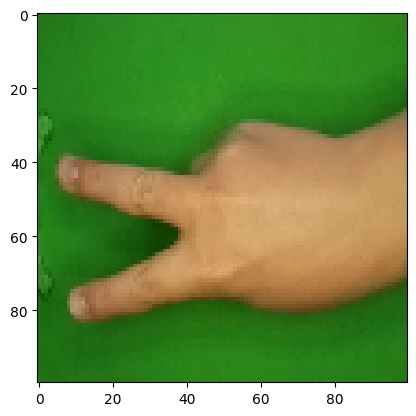

In [ ]:
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing import image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(100,100))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  print(fn)
  if classes[0][0] == 1:
    print('Paper')
  elif classes[0][1] == 1:
    print('Rock')
  else:
    print('Scissors')